# Click "Edit App" to see the code
# Progressive average

In this tutorial we will start by computing the average and standard deviation of a dataset as a function of the number of values that are included in the calculation. 

# The Jupyter NoteBook

Let's start by loading the usual python libraries

In [1]:
# python packages
import pandas as pd # Dataframes and reading CSV files
import numpy as np # Numerical libraries
import matplotlib.pyplot as plt # Plotting library
from lmfit import Model # Least squares fitting library

We can then read the data into a dataframe using pandas and compute the number of data we have (numberOfValues) and average of the second column

In [2]:
data = pd.read_csv("../miscData/random2.csv")
data.columns = ("X","Y")
print(data)

           X          Y
0        0.0  19.941878
1        1.0  20.685043
2        2.0  19.844666
3        3.0  20.257218
4        4.0  21.523172
...      ...        ...
1995  1995.0  18.298792
1996  1996.0  22.114652
1997  1997.0  17.440644
1998  1998.0  17.251813
1999  1999.0  22.308369

[2000 rows x 2 columns]


In [3]:
average = np.mean(data["Y"])
print("Average of all data :",average)

Average of all data : 20.06100961117126


In the following we would call _progressive average_ the average as a function of the number of data that are processed. In order to compute this quantity and plot it, we need to define an array that will contain the _progressive average_ after the first one, two, three $\dots$ $N$ data points are used.
An array can be initialised using []

In [4]:
progressiveAverage = []

We can then  append the values of the average as we use more and more values. In order to do that, we write a loop and compute the average as we go.

In [5]:
tmpAverage = 0
counter = 0
for val in data["Y"]:
    # This variable contains the sum of the first i elements in the data array
    tmpAverage = tmpAverage + val 
    
    # This variable  counts the number of elements that have been added
    counter = counter + 1 
    
    # This is the progressive Average
    pAverage = tmpAverage / counter 
    
    # This appends to value to the array
    progressiveAverage.append(pAverage) 

We can then check that we have computed the average correctly by writing the last computed value of the progressive average

In [6]:
print("Average from the loop :",pAverage)

Average from the loop : 20.06100961117126


Let's now make a plot of the data and the progressive average.
Note we made the points smaller (s=10) and the line thicker (lw=5) and we have added the global average as an horizontal line,

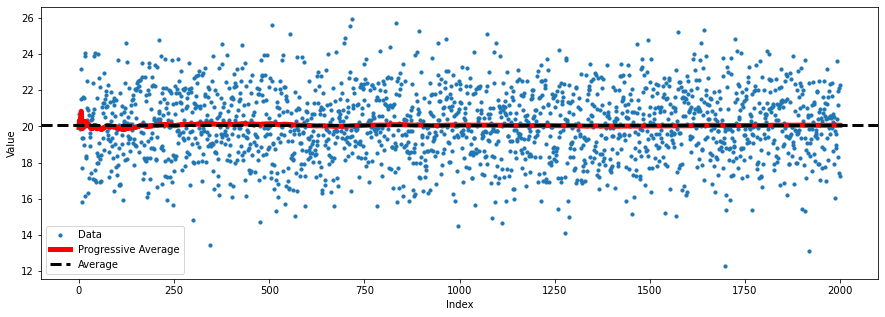

In [7]:
fig1 , ax = plt.subplots(figsize=(15,5))

# plotting the data as points
ax.scatter(data["X"],data["Y"],label="Data",s=10)

# adding the progressive average
ax.plot(data["X"],progressiveAverage,label="Progressive Average",color='red',lw=5)

# adding the total average as an horizontal line
average = np.mean(data["Y"])
ax.axhline(y=average, color='black', lw=3, linestyle="dashed", label="Average")

ax.set(xlabel="Index")
ax.set(ylabel="Value")

ax.legend()
plt.show()

An alternative approach to compute the progressive average, probably less computationally efficient is to use NumPy to compute the average of subsets of points. However, the syntax is much more compact.
* Note however the range that we need to use in the **iloc** function.

In [8]:
numberOfValues = len(data["Y"])
progressiveAverage2 = []
for i in range(0,numberOfValues):
    progressiveAverage2.append(np.mean(data.iloc[0:i+1]["Y"]))

We can then print the final average to make sure the procedure works as expected

In [9]:
print("Average from method #2",progressiveAverage2[numberOfValues-1])

Average from method #2 20.06100961117126


We can also plot only the progressive average to see how it converges to the average of the entire dataset.

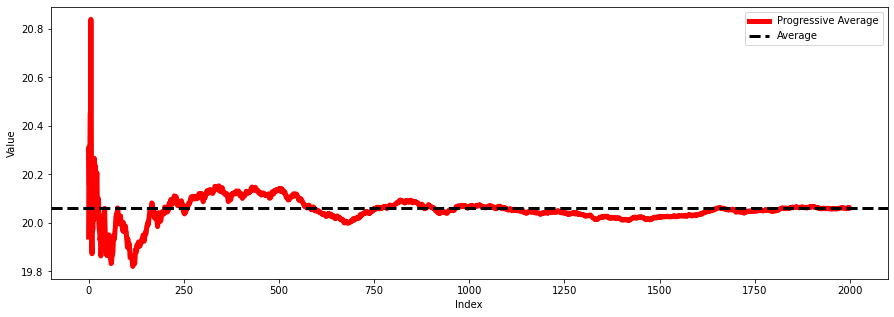

In [10]:
fig1 , ax = plt.subplots(figsize=(15,5))

# plotting the data as points
# ax.scatter(data["X"],data["Y"],label="Data",s=10)

# adding the progressive average computed with the first second method
ax.plot(data["X"],progressiveAverage2,label="Progressive Average",color='red',lw=5)
ax.axhline(y=average, color='black', lw=3, linestyle="dashed", label="Average")

ax.set(xlabel="Index")
ax.set(ylabel="Value")

ax.legend()
plt.show()

Let's now use the same procedure to compute the _progressive_ for the standard deviation and standard error.

In [11]:
standardDeviation = []
standardError = []
for i in range(1,numberOfValues+1):
    std = np.std(data.iloc[0:i,1])
    standardDeviation.append(std)
    standardError.append(std/np.sqrt(i))

We can now create a figure with the _progressive_ standard deviation and standard error, and also a dotted line for the zero to show that the standared error asymptotically goes to zero

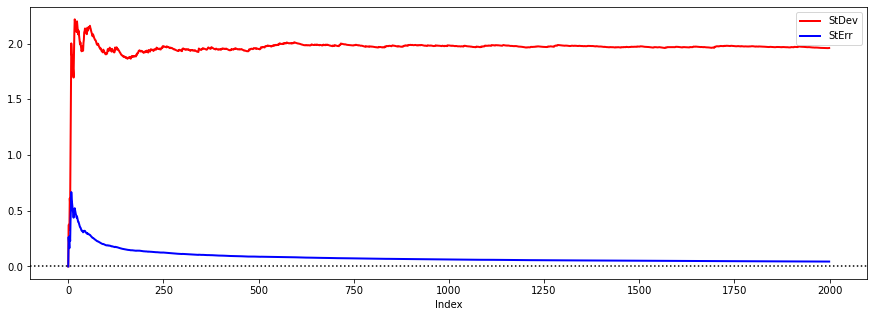

In [12]:
fig1 , ax = plt.subplots(figsize=(15,5))

# adding the standard deviation
ax.plot(data["X"],standardDeviation,label="StDev",color='red',lw=2)

# adding the standard Error
ax.plot(data["X"],standardError,label="StErr",color='blue',lw=2)

# let's also add an horizontal line for the zero
ax.axhline(0,color='black',linestyle=":")

ax.set(xlabel="Index")

ax.legend()
plt.show()

As expected for the random #2 dataset, the standard converges to a finite values, while the standard error asymptotically tends to zero as $1/\sqrt{N}$